In [1]:
pip install requests beautifulsoup4 pandas matplotlib


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
url = 'https://cbr.ru/hd_base/metall/metall_base_new/?UniDbQuery.Posted=True&UniDbQuery.From=01.01.2023&UniDbQuery.To=21.09.2024&UniDbQuery.Gold=true&UniDbQuery.Silver=true&UniDbQuery.Platinum=true&UniDbQuery.Palladium=true&UniDbQuery.so=1'
response = requests.get(url)
page_content = response.content

In [5]:
soup = BeautifulSoup(page_content, 'html.parser')
table = soup.find('table', {'class': 'data'})
rows = table.find_all('tr')

In [6]:
data = []
for row in rows[1:]: # Пропускаем заголовок
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append(cols)
df = pd.DataFrame(data, columns=['Date', 'Gold', 'Silver', 'Platinum', 'Palladium'])
df['Gold'] = df['Gold'].str.replace(',', '.')
df['Silver'] = df['Silver'].str.replace(',', '.')
df['Platinum'] = df['Platinum'].str.replace(',', '.')
df['Palladium'] = df['Palladium'].str.replace(',', '.')
df['Gold'] = df['Gold'].str.replace(' ', '')
df['Silver'] = df['Silver'].str.replace(' ', '')
df['Platinum'] = df['Platinum'].str.replace(' ', '')
df['Palladium'] = df['Palladium'].str.replace(' ', '')
df['Gold'] = df['Gold'].astype(float)
df['Silver'] = df['Silver'].astype(float)
df['Platinum'] = df['Platinum'].astype(float)
df['Palladium'] = df['Palladium'].astype(float)

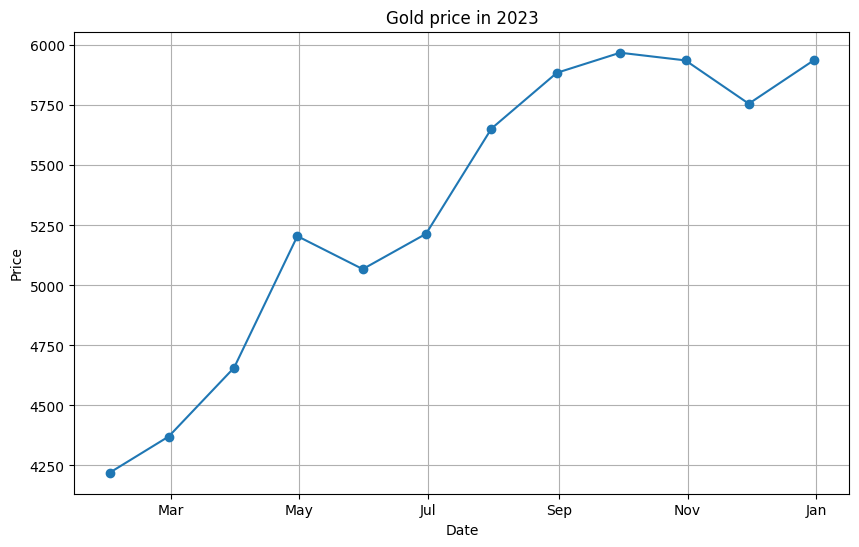

In [28]:
import matplotlib.dates as mdates

df['Date'] = pd.to_datetime(df['Date'])

df_2023 = df[df['Date'].dt.year == 2023]

df_monthly = df_2023.groupby(pd.Grouper(key='Date', freq='M'))['Gold'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_monthly['Date'], df_monthly['Gold'], marker='o')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.title('Gold price in 2023')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)

plt.show()

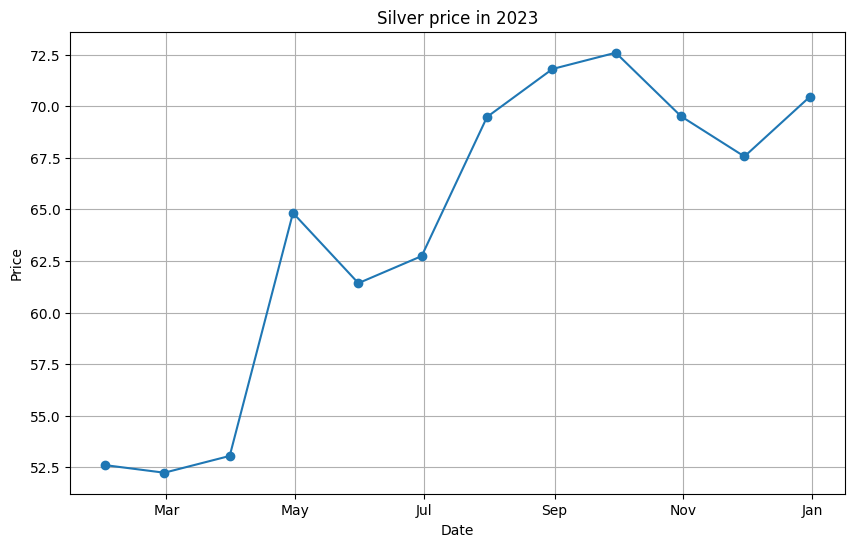

In [27]:
df['Date'] = pd.to_datetime(df['Date'])

df_2023 = df[df['Date'].dt.year == 2023]

df_monthly = df_2023.groupby(pd.Grouper(key='Date', freq='M'))['Silver'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_monthly['Date'], df_monthly['Silver'], marker='o')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.title('Silver price in 2023')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)

plt.show()

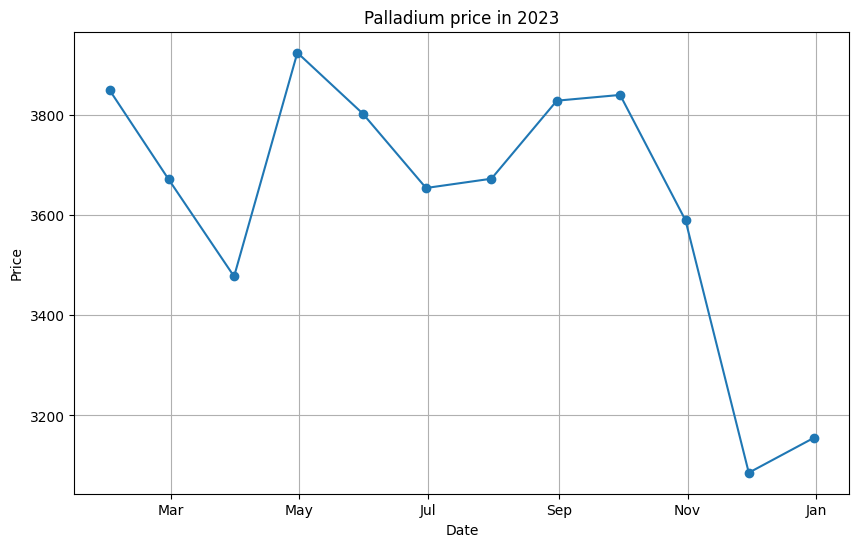

In [25]:
df['Date'] = pd.to_datetime(df['Date'])

df_2023 = df[df['Date'].dt.year == 2023]

df_monthly = df_2023.groupby(pd.Grouper(key='Date', freq='M'))['Palladium'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_monthly['Date'], df_monthly['Palladium'], marker='o')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.title('Palladium price in 2023')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)

plt.show()

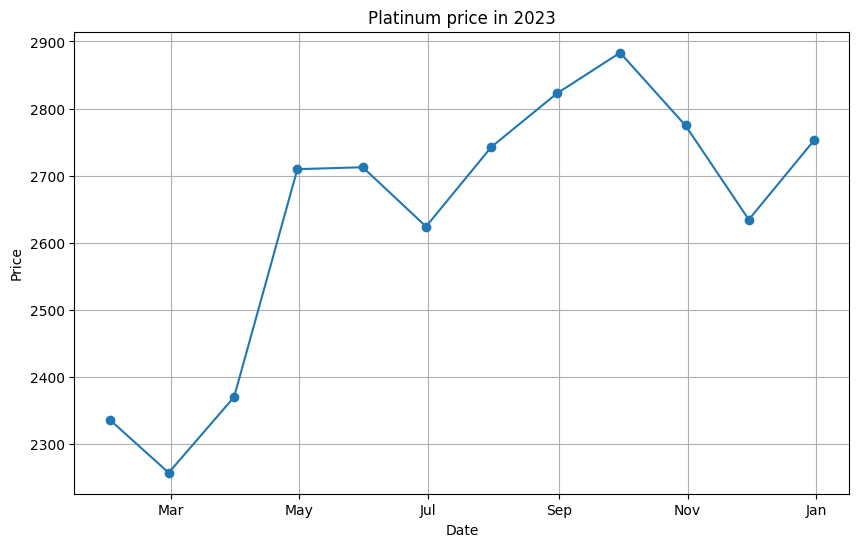

In [26]:
df['Date'] = pd.to_datetime(df['Date'])

df_2023 = df[df['Date'].dt.year == 2023]

df_monthly = df_2023.groupby(pd.Grouper(key='Date', freq='M'))['Platinum'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_monthly['Date'], df_monthly['Platinum'], marker='o')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.title('Platinum price in 2023')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)

plt.show()

In [23]:
date_max_gold = df.loc[df['Gold'] == 7665.960000, 'Date'].values[0]

print(date_max_gold)

2024-09-21T00:00:00.000000000


In [22]:
df.describe()


,Date,Gold,Silver,Platinum,Palladium
count,424,424.000000,424.000000,424.000000,424.000000
mean,2023-11-16 06:20:22.641509376,5893.172193,70.388632,2690.096604,3283.207642
min,2023-01-10 00:00:00,4080.030000,48.740000,2173.440000,2316.520000
25%,2023-06-15 18:00:00,5277.982500,64.867500,2610.842500,2832.050000
50%,2023-11-12 12:00:00,5911.630000,69.635000,2709.845000,3353.360000
75%,2024-04-19 06:00:00,6590.145000,77.822500,2811.510000,3734.300000
max,2024-09-21 00:00:00,7665.960000,92.750000,3106.680000,4301.020000
std,NaN,837.521476,10.483729,185.502680,480.429102


Выводы (САМОЕ ВАЖНОЕ):
- средняя цена в 2023 году составляет: золото - 837.5, серебро - 10.5, платина - 185.5, палладий - 480.4.
- наиболее дорогим металлом является золото, на втором месте - палладий, третье и четвертое места занимают платина и серебро, наиболее дешевый драгоценный металл.
- максимальная цена на золото составила 7665.96 21 сентября 2024 года.
- у всех представленных драгоценных металлов за 2023 год наблюдаются как рост, так и падение цены. Однако у золота наблюдается более стабильный рост цены на протяжении года
- в марте средняя цена на золота, серебро и платину была самая низкая за 2023 год, а у палладия самая низкая средняя цена была в декабре 2023 года.